In [1]:
import pandas as pd
import sqlite3

In [ ]:
ord= pd.read_csv("orders.csv")
ord.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [ ]:
user= pd.read_json("users.json")
user.head()


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [7]:
conn = sqlite3.connect("restaurants.db")
print("connected")

connected


In [ ]:
try:
    with open("restaurants.sql", "r", encoding="utf-8") as f:
        sql_script = f.read()
    conn.executescript(sql_script)
    print("restaurants.sql executed successfully")
except Exception as e:
    print("SQL already executed or skipped safely")
    print(e)

SQL already executed or skipped safely
table restaurants already exists


In [40]:
restaurants = pd.read_sql(
    "SELECT * FROM restaurants",
    conn
)
restaurants.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [41]:
restaurants.columns

Index(['restaurant_id', 'restaurant_name', 'cuisine', 'rating'], dtype='object')

In [43]:
ord_user = ord.merge(
    user,
    on="user_id",
    how="left"
)

In [46]:
final_df = ord_user.merge(
    restaurants,
    on="restaurant_id",
    how="left"
)

In [47]:
final_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [48]:
final_df.shape

(10000, 12)

In [51]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)

In [52]:
final_df.isnull().sum()

order_id             0
user_id              0
restaurant_id        0
order_date           0
total_amount         0
restaurant_name_x    0
name                 0
city                 0
membership           0
restaurant_name_y    0
cuisine              0
rating               0
dtype: int64

In [53]:
final_df["order_date"] = pd.to_datetime(
    final_df["order_date"],
    format="%d-%m-%Y"
)

In [54]:
final_df["year"] = final_df["order_date"].dt.year
final_df["month"] = final_df["order_date"].dt.month
final_df["quarter"] = final_df["order_date"].dt.to_period("Q").astype(str)

In [55]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)

In [56]:
final_df["order_id"].nunique()
final_df["membership"].value_counts()
final_df.groupby("city")["total_amount"].sum().sort_values(ascending=False)

city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
final_df = pd.read_csv("final_food_delivery_dataset.csv")

C:\Users\Rithika\AppData\Local\Temp\ipykernel_2916\316361293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_revenue.index, y=city_revenue.values, palette="viridis")


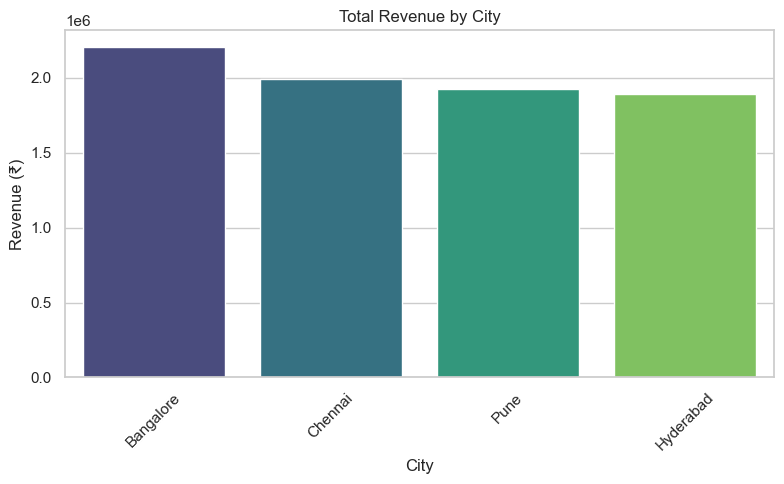

In [ ]:
city_revenue = final_df.groupby('city')['total_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=city_revenue.index, y=city_revenue.values, palette="viridis")
plt.title("Total Revenue by City")
plt.ylabel("Revenue (₹)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Rithika\AppData\Local\Temp\ipykernel_2916\1757032290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aov_membership.index, y=aov_membership.values, palette="magma")


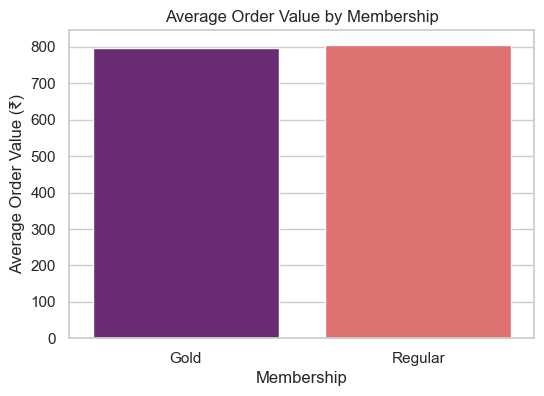

In [61]:
aov_membership = final_df.groupby('membership')['total_amount'].mean().round(2)

plt.figure(figsize=(6,4))
sns.barplot(x=aov_membership.index, y=aov_membership.values, palette="magma")
plt.title("Average Order Value by Membership")
plt.ylabel("Average Order Value (₹)")
plt.xlabel("Membership")
plt.show()